In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import json
import itertools
import seaborn as sb

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
predictions = pd.read_csv("../predicted_results/predictions_all.csv", sep="|")

<IPython.core.display.Javascript object>

In [3]:
predictions.head()

,NEW_PREDICTED,Descript,Category
0,BURGLARY,"BURGLARY OF STORE, FORCIBLE ENTRY",BURGLARY
1,SECONDARY CODES,GANG ACTIVITY,SECONDARY CODES
2,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,SUSPICIOUS OCC
3,ASSAULT,AGGRAVATED ASSAULT WITH A KNIFE,ASSAULT
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,LARCENY/THEFT


<IPython.core.display.Javascript object>

In [4]:
# predictions = predictions[0:7000]
labels = pd.concat([predictions["NEW_PREDICTED"], predictions["Category"]])

<IPython.core.display.Javascript object>

In [5]:
labels = list(labels.unique())
labels, len(labels)

(['BURGLARY',
  'SECONDARY CODES',
  'SUSPICIOUS OCC',
  'ASSAULT',
  'LARCENY/THEFT',
  'OTHER OFFENSES',
  'WARRANTS',
  'NON-CRIMINAL',
  'DRUG/NARCOTIC',
  'VEHICLE THEFT',
  'ROBBERY',
  'VANDALISM',
  'TRESPASS',
  'FRAUD',
  'MISSING PERSON',
  'STOLEN PROPERTY',
  'DRUNKENNESS',
  'DRIVING UNDER THE INFLUENCE',
  'FORGERY/COUNTERFEITING',
  'WEAPON LAWS',
  'DISORDERLY CONDUCT',
  'SEX OFFENSES FORCIBLE',
  'FAMILY OFFENSES',
  'KIDNAPPING',
  'PROSTITUTION',
  'LOITERING',
  'LIQUOR LAWS',
  'ARSON',
  'SUICIDE',
  'RUNAWAY',
  'EMBEZZLEMENT',
  'BAD CHECKS',
  'EXTORTION',
  'BRIBERY',
  'PORNOGRAPHY/OBSCENE MAT',
  'SEX OFFENSES NON FORCIBLE',
  'RECOVERED VEHICLE'],
 37)

<IPython.core.display.Javascript object>

In [6]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    # print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = ".1f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [7]:
cnf_matrix = confusion_matrix(
    y_true=predictions["Category"], y_pred=predictions["NEW_PREDICTED"]
)

<IPython.core.display.Javascript object>

Normalized confusion matrix


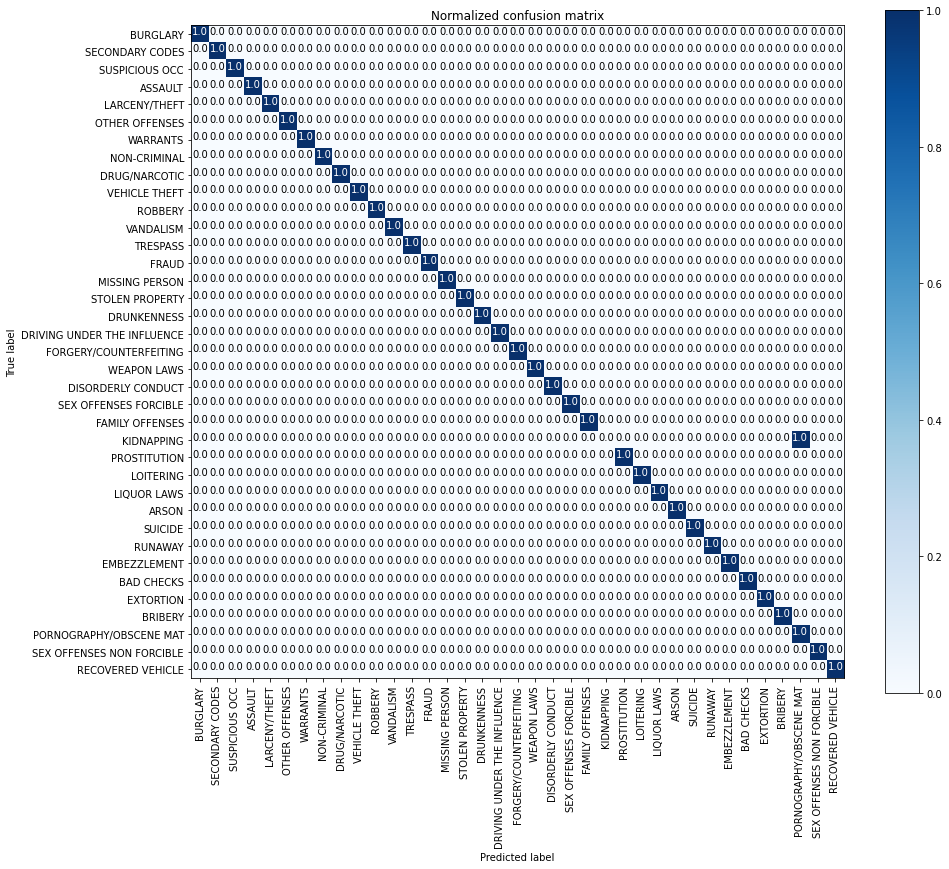

<IPython.core.display.Javascript object>

In [8]:
# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(14, 12, forward=True)
# fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(
    cnf_matrix,
    classes=np.asarray(labels),
    normalize=True,
    title="Normalized confusion matrix",
)

fig.savefig("txt_classification-smote" + ".png", pad_inches=5.0)

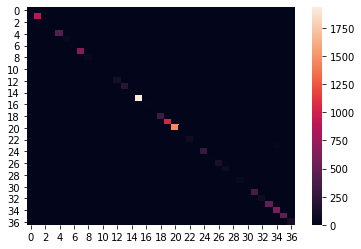

<IPython.core.display.Javascript object>

In [9]:
cnf_plot = sb.heatmap(cnf_matrix)
plt.savefig("seaborn_cnf_matrix.png", dpi=300)

## Kappa Score

In [10]:
from sklearn.metrics import cohen_kappa_score

cohen_score = cohen_kappa_score(predictions["Category"], predictions["NEW_PREDICTED"])

<IPython.core.display.Javascript object>

In [11]:
cohen_score

0.995132969324422

<IPython.core.display.Javascript object>

In [12]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(
    predictions["Category"], predictions["NEW_PREDICTED"]
)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))

precision: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.83333333 1.         1.         1.
 1.         1.         0.99727335 1.         1.         0.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.94098884 1.
 1.        ]
recall: [1.         0.99669604 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.997921   0.99494098 1.
 1.        ]
fscore: [1.         0.99834528 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.90909091 1.         1.         1.
 1.         1.         0.99863481 1.         1.         0.
 1.

/Users/jacobjohn/Code/crime-heat-mapping/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

In [13]:
precision, recall, fscore, support = score(
    predictions["Category"], predictions["NEW_PREDICTED"], average="macro"
)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))

precision: 0.9667998788115031
recall: 0.9726907570605637
fscore: 0.9695200956071606
support: None


/Users/jacobjohn/Code/crime-heat-mapping/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

## ROC

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np


cm = confusion_matrix(predictions["Category"], predictions["NEW_PREDICTED"])
recall = np.diag(cm) / np.sum(cm, axis=1)
precision = np.diag(cm) / np.sum(cm, axis=0)

print(recall)

print(precision)

[1.         0.99669604 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.997921   0.99494098 1.
 1.        ]
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.83333333 1.         1.         1.
 1.         1.         0.99727335 1.         1.                nan
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.94098884 1.
 1.        ]


<ipython-input-14-56e6576284db>:7: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diag(cm) / np.sum(cm, axis=0)


<IPython.core.display.Javascript object>

In [15]:
train = predictions["Category"]
preds = predictions["NEW_PREDICTED"]

<IPython.core.display.Javascript object>

In [16]:
n = len(train)
num_labels = len(labels)
y_train = np.zeros((n, num_labels))
y_pred = np.zeros((n, num_labels))

<IPython.core.display.Javascript object>

In [17]:
for i in range(n):
    y_train[i][labels.index(predictions["Category"][i])] = 1
y_train.shape

(10000, 37)

<IPython.core.display.Javascript object>

In [18]:
for i in range(n):
    y_pred[i][labels.index(predictions["Category"][i])] = 1
y_pred.shape

(10000, 37)

<IPython.core.display.Javascript object>

<ipython-input-19-f53f30955fcb>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


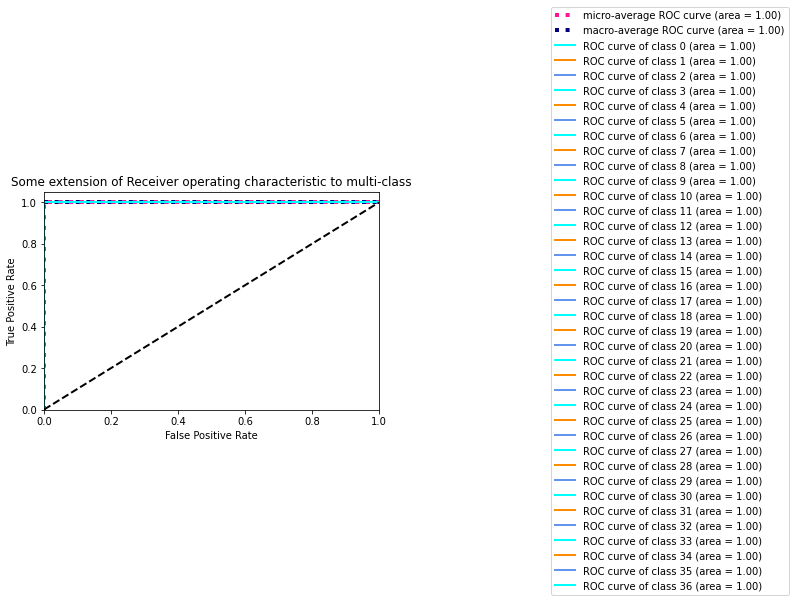

<IPython.core.display.Javascript object>

In [19]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle


def export_legend(legend, filename="legend.png"):
    fig = legend.figure
    fig.canvas.draw()
    bbox = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_labels):
    fpr[i], tpr[i], _ = roc_curve(y_train[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_train.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_labels)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_labels):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_labels

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})" "".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})" "".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(num_labels), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})" "".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multi-class")
# Put a legend to the right of the current axis
plt.legend(loc="center left", bbox_to_anchor=(1.5, 0.5))
plt.savefig("ROC.png", dpi=300, bbox_inches="tight")
plt.show()

In [20]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_labels):
    precision[i], recall[i], _ = precision_recall_curve(y_train[:, i], y_pred[:, i])
    average_precision[i] = average_precision_score(y_train[:, i], y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_train.ravel(), y_pred.ravel()
)
average_precision["micro"] = average_precision_score(y_train, y_pred, average="micro")
print(
    "Average precision score, micro-averaged over all classes: {0:0.2f}".format(
        average_precision["micro"]
    )
)

Average precision score, micro-averaged over all classes: 1.00


<IPython.core.display.Javascript object>

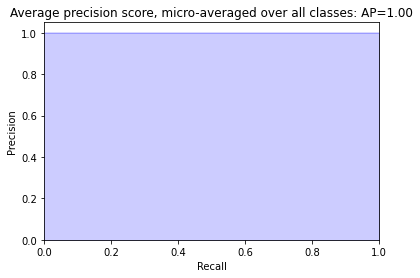

<IPython.core.display.Javascript object>

In [21]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')#,
                 #**step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
plt.savefig('avg_precision_score',dpi=300)
plt.show()


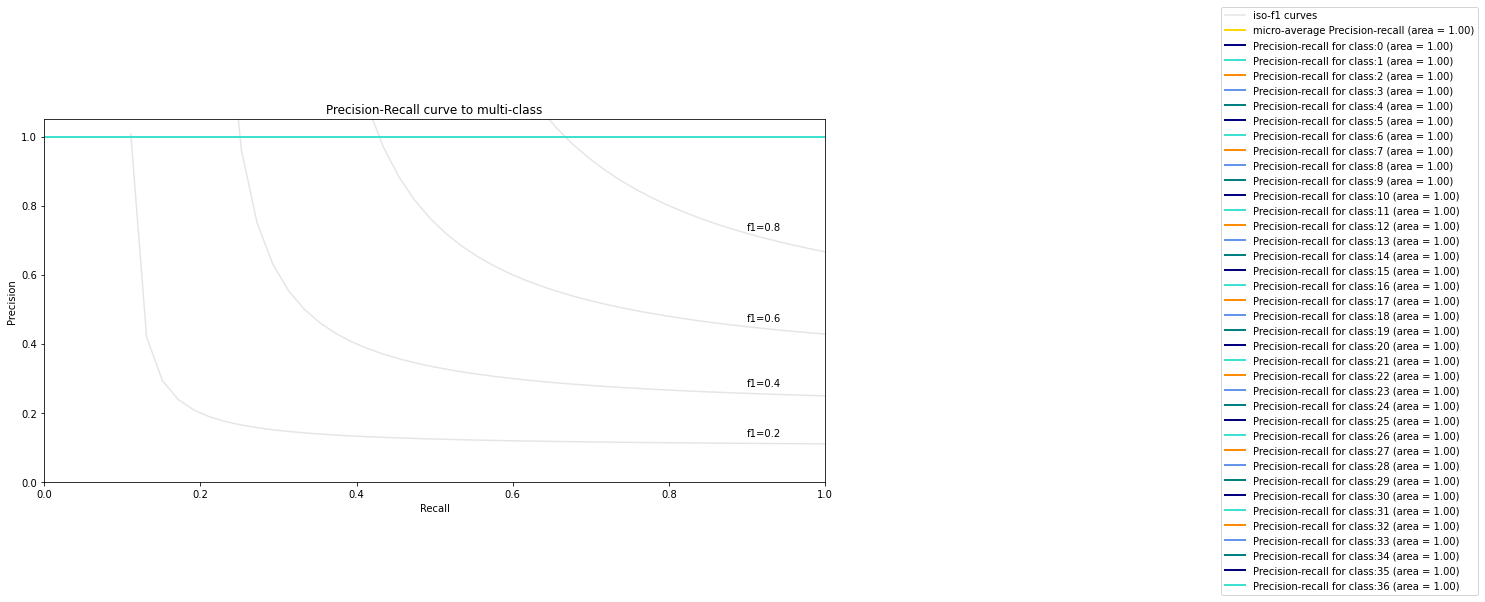

<IPython.core.display.Javascript object>

In [22]:
from itertools import cycle

# setup plot details
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

plt.figure(figsize=(14, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append("iso-f1 curves")
(l,) = plt.plot(recall["micro"], precision["micro"], color="gold", lw=2)
lines.append(l)
labels.append(
    "micro-average Precision-recall (area = {0:0.2f})"
    "".format(average_precision["micro"])
)

for i, color in zip(range(num_labels), colors):
    (l,) = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append(
        "Precision-recall for class:{0} (area = {1:0.2f})"
        "".format(i, average_precision[i])
    )

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve to multi-class")
plt.legend(
    lines, labels, loc="center left", prop=dict(size=10), bbox_to_anchor=(1.5, 0.5)
)
plt.savefig("prec-recall.png", dpi=300, bbox_inches="tight")
plt.show()